<img src="../figures/logos/logo_usc.jpg" align=right width='80px'/>
<br>

<table width="100%">
<tr>
<td style="font-size:40px;font-style:italic;text-align:left;background-color:rgba(0, 220, 170,0.7)">
The Art of Measurements I
</td>
</tr>
</table>

$ \renewcommand{\bra}[1]{\langle #1|} $
$ \renewcommand{\ket}[1]{|#1\rangle} $
$ \renewcommand{\braket}[2]{\langle #1|#2\rangle} $
$ \renewcommand{\i}{{\color{blue} i}} $ 
$ \renewcommand{\tr}{{\rm tr}} $
$ \renewcommand{\Hil}{{\mathcal H}} $
$ \renewcommand{\boldn}{{\bf n}} $
$ \renewcommand{\bn}{{\bf n}} $
$ \renewcommand{\bsig}{\boldsymbol{\sigma}} $

In [9]:
import sys
sys.path.append('../')

import macro_tQ as tQ

import numpy as np
import scipy.linalg as la

from IPython.display import display,Markdown,Latex
import matplotlib.pyplot as plt
from qiskit.visualization import array_to_latex

<a id='top'></a>

- [Measurements of 1 Qubit](#meas) 


- [Measurements in a general basis](#interf)

- [Expectation values](#exp_val)
 

<a id='meas'></a>

# Measurements of 1 Cubit
[<<<](#top)

## Measurements in the computational base

The **standard measurement circuit** is represented in the following form
<br>
<br>

<figure><center>
<img src="images/cubit_meter_zbasis.png" align=center width='50%'/>
</center></figure>
<br>



By default, it is a *projective measurement* associated with the observable operator $Z$. That is, it projects onto the basis $\ket{a} = \ket{0},\ket{1}$ of eigenstates of $Z$

$$
Z\ket{0} = +\ket{0}~~~~,~~~~~ Z\ket{1} = -\ket{1}
$$ 

We can abbreviate jointly, with $~a=0,1$ 

$$
Z\ket{a} = (-1)^a\ket{a}
$$ 


In general, the state is destroyed to the extent that the quantum thread is usually omitted at its output
<br>
<br>
<br>
    
<figure><center>
<img src="images/cubit_meter1.png" align=center width='30%'/>
</center></figure>
<br>

It is a *projective measure* associated with the observable $Z = \sigma_z $. 
<br>

$$
Z\ket{0} = +\ket{0}~~~~,~~~~~ Z\ket{1} = -\ket{1}
$$ 


We can unify both results as: $~Z\ket{a} = (-1)^a\ket{a}$, 
with $a=\{0,1\}$.

## Measurement Probabilities

A repetition of measurements of the state $\ket{\psi} = c_0\ket{0} + c_1\ket{1}$ provides statistical access to the *probability amplitudes* 

<br>


$$
p(0) = \frac{n_{0}}{N} = |c_0|^2 = |\braket{0}{\psi}|^2~~~~~~~~~~~~~~~~ p(1) = \frac{n_{1}}{N}=|c_1|^2 =  |\braket{1}{\psi}|^2 \, .
$$
<br>

This reconstruction procedure is the basis of **quantum tomography**.



Let's define a random vector

<IPython.core.display.Latex object>

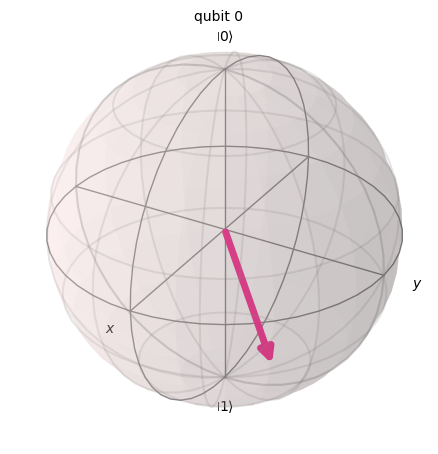

In [18]:
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, array_to_latex  

theta = 1.9
phi   = 0.8

' inicialicemos un estado cuántico'
psi_ket = np.array([np.cos(theta/2),(np.exp(1j*phi))*np.sin(theta/2)]).reshape(2,1)
array_to_latex(psi_ket,prefix= '\ket{\psi} = ')

display(Statevector(psi_ket).draw('latex'))
display(Statevector(psi_ket).draw('Bloch'))

The probabilities of obtaining '0' and '1' are the squares of the amplitudes in absolute value

In [5]:
p0 = np.abs(psi_ket[0])**2
p1 = np.abs(psi_ket[1])**2

print('p(0)=', np.round(p0,5),', p(1)=', np.round(p1,5))

p(0)= [0.33836] , p(1)= [0.66164]


We are going to recover them *experimentally* by simulating a circuit. First, we obtain the dictionary of accounts obtained after executing the circuit a number of times

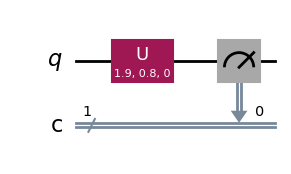

{'1': 6603, '0': 3397}

In [7]:
nshots = 10000

from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
backend = AerSimulator()

'insert the state $\psi$ into a circuit'
qc_psi_Qiskit = QuantumCircuit(1,1)
qc_psi_Qiskit.u(theta,phi,0,0)
qc_psi_Qiskit.measure(0,0)
display(qc_psi_Qiskit.draw('mpl'))

'execute the circuit a number of times = nshots'
counts_psi =  backend.run(qc_psi_Qiskit,shots=nshots).result().get_counts()
counts_psi

We visualize the result using a histogram

counts_psi =  {'1': 6603, '0': 3397}


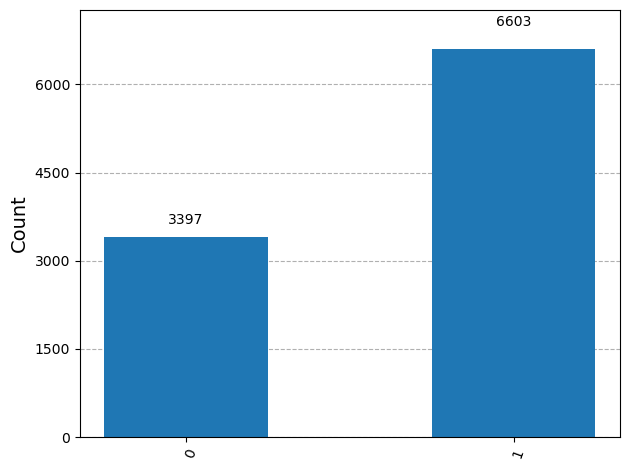

In [8]:
from qiskit.visualization import plot_histogram
print('counts_psi = ',counts_psi)

plot_histogram(counts_psi)  

Now we can calculate the relative frequencies $n_i/N$ and compare them with the probabilities $p(i)$

In [21]:
p0_experiment = counts_psi['0']/nshots
p1_experiment = counts_psi['1']/nshots

print('p(0)_experiment =', p0_experiment,'  p(1)_experiment = ',p1_experiment)

p(0)_experiment = 0.3387   p(1)_experiment =  0.6613


## Measurements in a Real Quantum Computer


Once we have verified that the program runs well in our simulator, we can launch it on a real quantum computer by simply changing the *backend*.

For now, we will use IBM's free computers. To do this, it is necessary to create a user account at https://quantum-computing.ibm.com/

Go to https://quantum-computing.ibm.com/account and get API-token in the MyAccount section. Copy token and paste in the following cell in between the brackets (after uncommenting the line)

https://docs.quantum.ibm.com/guides/setup-channel

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService
service = QiskitRuntimeService(channel="ibm_quantum", token="<TOKEN>")

In [ ]:
# Save an IBM Quantum account and set it as your default account.
# QiskitRuntimeService.save_account(
#    token="<TOKEN>",
#    channel="ibm_quantum",
#    set_as_default=True,
#    # Use `overwrite=True` if you're updating your token.
#    overwrite=True,
#)

In [ ]:
from qiskit
# Load saved credentials
service = QiskitRuntimeService()

In [ ]:
# Create empty circuit
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)
qc.measure_all()

# Get the least busy backend
backend = service.least_busy(operational=True, simulator=False)
print(backend)

from qiskit.compiler import transpile
transqc = transpile(qc,backend)
transqc.draw('mpl')

In [ ]:
from qiskit_ibm_runtime import SamplerV2 as Sampler

sampler = Sampler(backend)
job = sampler.run([transqc])

service.jobs(backend_name=backend)

In [ ]:
job.cancel()

In [ ]:
service.jobs(backend_name=backend)

In [ ]:
print(f"job id: {job.job_id()}")
result=job.result().quasi_dists[0]
print(result)



In [ ]:
plot_histogram(counts)

## Quantum Interference and Measurements

The result of flipping a coin is an equiprobable binary random variable: X = (heads,tails).

It is irrelevant whether we analyze the result of each toss or every two or three tosses. The relative frequencies of heads and tails will always be close to $1/2$.

We can imagine a similar experiment with a qubit, where heads $\to \ket{0}$ and tails $\to\ket{1}$ are the possible measurement states in the $Z$ basis.

Flipping the classic coin is putting it in a state that can be heads or tails when it lands on the table.

Flipping the quantum coin is applying the operator $H$ to put either of the two results in a superposition.

$$
H\ket{0} = \frac{1}{\sqrt{2}}(\ket{0} + \ket{1})$$ 

and 

$$H\ket{1} = \frac{1}{\sqrt{2}}(\ket{0} - \ket{1})$$ 


Now it is not the same to measure the result after one throw

$$
\ket{0}~ \stackrel{\rm throw}{\longrightarrow} ~ H \ket{0}= \ket{+} ~ \stackrel{\rm measure}{\longrightarrow} ~p(0) = p(1) = 0.5
$$
as doing it after two throws

$$
\ket{0}~ \stackrel{\rm throw}{\longrightarrow} ~ H \ket{0}~ \stackrel{\rm throw}{\longrightarrow} H^2\ket{0} = \ket{0} ~ \stackrel{\rm measure}{\longrightarrow} ~p(0) = 1 ~,~p(1) = 0
$$

In [ ]:
qc = QuantumCircuit(1,1)

qc.h(0)
#qc.measure(0,0) #anula o no esta medición intermedia para ver la diferencia
qc.h(0)
qc.measure(0,0)
qc.draw('mpl')

Let's run the circuit with and without intermediate measurement

In [ ]:
AerSimulator().run(qc).result().get_counts()

The intermediate measurement destroys the superposition and collapses the state to $\ket{0}$ or $\ket{1}$.

Without such measurement, the probability amplitudes of the paths that would lead to $\ket{1}$ from $\ket{0}$ interfere destructively.

This example we have just seen is the simplest version of the <i>double-slit experiment</i>. In it, the dark stripes that appear behind are due to destructive interference of the wave function. This interference disappears if we try to find out through which of the two slits the electron has passed.

<a id='gen_basis'></a>

# Measurements in a General Basis
[<<<](#top)

Conventionally, $Z$ is referred to as the observable associated with the standard measurement in a quantum computer.

If the qubit was a spin, $Z$ would correspond to a Stern Gerlach device with the magnetic field pointing in the $z$ direction

We should be able to modify the measurement basis at will. We will first study how to use the $X$ and $Y$ bases and then analyze the arbitrary case.

## Bases X and Y

The eigenvectors of the operator $X$ are called $\ket{+}, \ket{-}$ with eigenvalues $+1$ and $-1$ respectively.

We would like to have a circuit associated with this observable, so than states $\ket{\pm}$  will we detected as an eigenstates with eigenvalue $\pm 1$ hence returning values $a = 0,1$ respectively.

It is easy to construct such a circuit, as seen in the figure below.
<br>
<br>

<figure><center>
<img src="images/meter_xybasis.png" align=center width='60%'/>
</center></figure>


In the first, the action of $H$ sends each eigenstate of $X$ to an eigenstate of $Z$, $H\ket{+} = \ket{0}$ and $H\ket{-} = \ket{1}$.

Next, a standard meter will record the value of $a =0,1$ depending on the measured state.

A subsequent application of $H$ will return us to the original state $H\ket{0} = \ket{+}$ and similarly $H\ket{1} = \ket{-}$


Similarly, let's denote $\ket{+ i}$ and $\ket{- i}$ as the eigenstates of the operator $Y$.

We can construct a circuit that records $a = 0,1$ when the incident state is $\ket{\pm i}$.

It is enough to observe that $\ket{\pm i} = SH\ket{a}$. Conversely, $\ket{a} = HS^\dagger \ket{\pm i}$ and proceed as before.

In summary: we can *build* *effective* measuring devices that act on the bases $X$ and $Y$ just as the standard meter does on $Z$
<br>
<br>

<figure><center>
<img src="images/meter_xybasis2.png" align=center width='60%'/>
</center></figure>
<br>

Behind these circuit equivalences, now with meters, lies the following gate conjugation

$$
X = H Z H
~~~~~~~~,~~~~~~~~~Y = SHZ HS^\dagger
$$

<div class="alert alert-block alert-danger",text-align:center>
<p style="text-align: left ;">  
<b>Note</b>:
remember that the order of operator composition is reversed when implementing them in a circuit
</p>    
</div>

<div class="alert alert-block alert-success">
<b>Exercise:</b> 
Verify that these conjugation equations are correct
</div>

<div class="alert alert-block alert-success">
<b>Exercise:</b> 
In the figure, we observe the result of passing a cloud of electrons through three perpendicular Stern-Gerlach detectors.
<br>
<br>
    
    
<div>
<img src="images/Stern-Gerlach3.png" width="600"/>
</div>
<i>credits: https://commons.wikimedia.org/wiki/user:MJasK</i>
    
Reproduce this experiment on a quantum computer. Take the $Y$ axis as the propagation axis and orient the detectors successively along $Z$, and $X$ and $Z$ again. 
    
Run the circuit by launching the electrons one by one in an arbitrary initial state and observe the intermediate results. 
    
Now launch a cloud of electrons and observe the statistics    
</div>

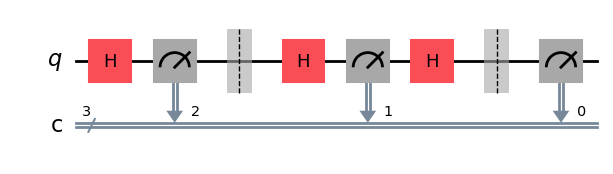

{'100': 1}

In [22]:
'solution'
qc = QuantumCircuit(1,3)

qc.h(0)

qc.measure(0,2)

qc.barrier()
qc.h(0)
qc.measure(0,1)
qc.h(0)
qc.barrier()

qc.measure(0,0)

display(qc.draw('mpl',style="iqp"))

AerSimulator().run(qc,shots=1).result().get_counts()



Let's define a function that executes measurements on any of the three axes

In [10]:
def measure_XYZ(qc,axis="Z",shots=1024):
     
    import copy 
    qc0 = copy.deepcopy(qc)
    if axis == "Z":
        qc0.measure(0,0)
    if axis == "X":
        qc0.h(0)
        qc0.measure(0,0) 
        qc0.h(0)
    elif axis == "Y":
        qc0.sdg(0)
        qc0.h(0)
        qc0.measure(0,0) 
        qc0.h(0)
        qc0.s(0)
     
    from qiskit_aer import AerSimulator
    counts=AerSimulator().run(qc0,shots=shots).result().get_counts()
    
    return counts

Now we can observe the result of successive measurements along different axes

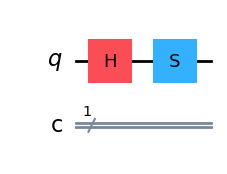

cuentas(base Z)= {'0': 5047, '1': 4953}
cuentas(base X)= {'0': 4949, '1': 5051}
cuentas( base Y)= {'0': 10000}


In [15]:
shots = 10000

qc = QuantumCircuit(1,1)
qc.h(0)
qc.s(0)
display(qc.draw('mpl',style="iqp"))

cuentasz = measure_XYZ(qc,axis="Z",shots=shots)
print("cuentas(base Z)=",cuentasz)

cuentasx = measure_XYZ(qc,axis="X",shots=shots)
print("cuentas(base X)=",cuentasx)

cuentasy = measure_XYZ(qc,axis="Y",shots=shots)
print("cuentas( base Y)=",cuentasy)


## General Formalism

Let's look at the two previous cases as particular instances of a measurement apparatus associated with an arbitrary direction on the Bloch sphere. Given a unit vector $~\hat\boldn~$

$$
\hat\bn(\theta,\phi) = \sin\theta\cos\phi \, \hat {\bf x} + \sin\theta\sin\phi \, \hat {\bf y} + \cos\theta \, \hat {\bf z}
$$


the associated observable will be $ \hat{\boldn}\cdot \boldsymbol{\sigma}$ whose eigenstates form a basis $\{\ket{0}_{\hat{\bf n}}, \ket{1}_{\hat{\bf n}}\}$ with eigenvalues $\pm 1$

$$
\hat{\boldn}\cdot \boldsymbol{\sigma}\,\ket{0}_{\hat{\bf n}} = + \ket{0}_{\hat{\bf n}}~~~~~~,~~~~~~~
\hat{\boldn}\cdot \boldsymbol{\sigma}\,\ket{1}_{\hat{\bf n}} = - \ket{1}_{\hat{\bf n}}
$$

given by 


$$
 \ket{0}_{\hat{\bf n}} = ~\begin{bmatrix} \cos\displaystyle\frac{\theta}{2} \\  ~e^{i\phi}\sin\displaystyle\frac{\theta}{2} \end{bmatrix} ~~~~~~~~~~~,~~~~~~~~~~~
 \ket{1}_{\hat{\bf n}} =  \begin{bmatrix} -e^{-i\phi}\sin\displaystyle\frac{\theta}{2} \\  \cos\displaystyle\frac{\theta}{2} \end{bmatrix} 
$$




Using rotation operators, we can convert the standard meter associated with $Z$ into an effective meter associated with the general observable $\hat {\bf n} \cdot \bsig$. Let's see how:

- let $~\hat{\bf z}\cdot\bsig ~$ be the <u>*standard measuring device*</u> oriented along the $~\hat{\bf z}$ axis

$$
 \hat{\bf z}\cdot \bsig \,  \ket{a}_{\hat{\bf z}} = (-1)^a\ket{a}_{\hat{\bf z}} = Z \ket{a} 
$$

- and $~\hat\bn\cdot \bsig~$ the <u>oriented measuring device</u> along the $\hat\bn$ axis

$$
\hat\bn\cdot \bsig \,  \ket{a}_{\hat{\bf n}} = (-1)^a\ket{a}_{\hat{\bf n}}
$$



the eigenvector bases associated $\{\ket{a}_{\hat{\bf z}}\}$ and  $\{\ket{a}_{\hat{\bf n}}\}$ are related through a simple unitary *rotation* $U = U(\hat{\bf z}\to \hat{\bf n})$

$$
\ket{0}_{\hat\boldn} = U \ket{0}_{\hat{\bf z}}~~~~~~,~~~~~~
\ket{1}_{\hat\boldn} = U \ket{1}_{\hat{\bf z}}
$$


<figure><center> 
<img src="images/BlochSphere_basis.png" align=center width='25%'/>
</center></figure>


The operator in question is 

$$
U(\hat {\bf z}\to \hat \bn) = U(\theta,\phi,0)=\begin{bmatrix}   \cos \displaystyle\frac{\theta}{2}  & -  \sin\displaystyle\frac{\theta}{2}  \\ 
\rule{0mm}{4mm} e^{i\phi} \sin \displaystyle\frac{\theta}{2} &e^{i\phi} \cos \displaystyle\frac{\theta}{2} \end{bmatrix}
$$

as is easy to verify

$$ 
\begin{bmatrix} \cos\theta \\ e^{i\phi}\sin\theta \end{bmatrix} = U\cdot \begin{bmatrix}1\\0 \end{bmatrix} ~~~~~~~,~~~~~~~
\begin{bmatrix} -\sin\theta \\ e^{i\phi}\cos\theta \end{bmatrix} = U\cdot \begin{bmatrix}0\\1 \end{bmatrix}  
$$

If the components of the vectors rotate in the form $\ket{a}_{\hat{\bf n}} = U\ket{a}_{\hat{\bf z}}$
the associated observables are related algebraically *as any operator does*

$$
\hat {\bf n} \cdot\bsig =  U \, (\hat {\bf z} \cdot \bsig)\,  U^\dagger 
$$

<details><summary><p> >> <i>We verify the consistency</i>  </p></summary>
\begin{eqnarray}
\hat {\bf n} \cdot \bsig\,  \ket{a}_{\hat{\bf n}} ~~&=&~~ 
U~ \hat {\bf z} \cdot \bsig ~  U^\dagger ~ U  \ket{a}_{\hat{\bf z}}\\  \rule{0mm}{8mm}
&=& U~ \hat {\bf z} \cdot \bsig ~   \ket{a}_{\hat{\bf z}}\\   \rule{0mm}{8mm}
&=& U\, Z \ket{a} = U (-1)^a \ket{a}_{\hat{\bf z}} \\  \rule{0mm}{8mm}
&=&  (-1)^a U\ket{a}_{\hat{\bf z}} \\  \rule{0mm}{8mm}
&=& (-1)^a \ket{a}_{\hat{\bf n}}  \rule{0mm}{8mm}
\end{eqnarray}
</details>


<div class="alert alert-block alert-success",text-align:center>
<p style="text-align: left ;">  
<b>Exercise</b>: 
verify by operating the previous equation
</p>    
</div>

The following circuit *simulates* a measurement apparatus in the basis $\{\ket{a}_{\hat{\bf n}}\}$
obtained by rotating the measurement apparatus in the basis $\{\ket{a}_{\hat{\bf n}}\}$ of $Z$ eigenstates.

<figure><center>   
<img src="images/nbasis_measure2.png" align=center width='40%'/>
</center></figure>

Note that

- the particular cases of $X$ and $Y$ bases are recovered with $U = H$ in the first case and $U = SH$ in the second.

- if the state is destroyed in the measurement or is not preserved afterward, we can simplify the measurement circuit to only report the measured value.

<figure><center>   
<img src="images/Un_meter_simple.png" align=center width='40%'/>
</center></figure>


<a id='exp_val'></a>
# Expectation Values
[<<<](#top)


Knowing the probabilities of occurrence of the possible eigenvalues $\lambda_i$ of an operator $A$, we have access to the expectation value

$$
\langle A \rangle_\psi = \bra{\psi}A\ket{\psi} = \sum_i p(\lambda_i) \lambda_i
$$

Since we only have one observable, the standard meter in the $Z$ direction, we will have to be creative to obtain this expected value.

The key is that we will only need the effective meters in the $X, Y$, and $Z$ bases.

## Decomposition in the Pauli Basis

The key lies in observing that <i>any observable</i> on a qubit $A = A^\dagger$ can be expanded in the basis $\sigma_i = \{I,X,Y,Z\}, \, i=0,1,2,3$

$$
A = a_0 I + a_1 X + a_2 Y  + a_3 Z \, . 
$$

with coefficients

$$
a_i = \frac{1}{2} \tr \, (A \sigma_i)\, .
$$

This expression is obtained by using the relation $\to  \tr\,  (\sigma_i \sigma_j) = 2 \delta_{ij}$.
<br>
<br>
    
<details><summary><p  > >> <i>Verification</i> </p></summary>
$$
\frac{1}{2} \tr \, (A \sigma_i) = \frac{1}{2} \tr \, \left((\sum_{j=0}^3 a_j \sigma_j) \sigma_i\right)
= \sum_{j=0}^3 a_j \, \frac{1}{2} \tr ( \sigma_j \sigma_i) = \sum_{j=0}^3 a_j \delta_{ji} = a_i
$$
    
</details>


Then, we will be able to obtain the expected value of $A$ if we are capable of measuring those of $X,$ $Y,$ and $Z$.

<br>

\begin{eqnarray*}
\langle A\rangle_\psi ~=~\bra{\psi}A\ket{\psi} ~&=& ~ 
\bra{\psi} a_0 I + a_1 X + a_2 Y  + a_3 Z \ket{\psi} \\ \rule{0mm}{16mm}
&=& ~a_0 + a_1 \langle X\rangle_\psi + a_2 \langle Y\rangle_\psi + a_3 \langle Z\rangle_\psi
\end{eqnarray*}


- $\langle Z \rangle_{\psi}$

The computational basis states are eigenstates of the operator $Z$ with eigenvalue $\pm 1$
<br>

$$
Z \ket{0} =+ \ket{0}   ~~~~~~~~~~~~~~~~~~~~~ Z \ket{1} =-\ket{1} 
$$
<br>

Given a state $\ket{\psi} = c^Z_0\ket{0} + c^Z_1\ket{1}$, repeated measurement randomly yields the eigenvalues of $Z \to \pm 1$ with relative frequencies 
<br>
<br>
$$(+1)\to n^Z_0 ~~~~~~~~~~~~~~~~~~~~~~~~ (-1)\to n^Z_1$$ 

The expected value is 

\begin{eqnarray*}
\langle Z \rangle_\psi = \bra{\psi} Z \ket{\psi} 
&=& \left( c^{*Z}_0\bra{0} + c^{*}Z_1\bra{1}\right) Z\left( c^Z_0\ket{0} + c^Z_1\ket{1}\right)  \nonumber \\ \rule{0mm}{12mm}
&=& \left( c^{*Z}_0\bra{0} + c^{*Z}_1\bra{1}\right) \left(+ c^Z_0\ket{0} - c^Z_1\ket{1}\right)  \nonumber \\  \rule{0mm}{12mm}
&=& (+1) |c^Z_0|^2 + (-1) |c^Z_1|^2    \nonumber \\  \rule{0mm}{12mm}
&=& +\frac{n^Z_0}{N}- \frac{ n^Z_1}{N}
\end{eqnarray*}

the average value, as expected

To measure eigenvalues $(-1)^a=+1,-1$ of $Z$ the circuit is simply
<br>
<br>


<figure><center>
<img src="images/cubit_meter1.png" align=center width='30%'/>
</center></figure>

- $\langle X \rangle_{\psi}$

In the $X$ basis, **the same state** of input will be written with other components $\ket{\psi} = c_0^X\ket{+} + c_1^X\ket{-}$.

If we now measure $\ket{\psi}$ in the $X$ basis, the repetition will yield a random sample of eigenvalues of $X\to \pm 1$ with frequencies 

$$~(+1)\to n^X_0  ~~~~~~~~~~~~~~~~~~~ (-1)\to n^X_1  $$

The expected value of $X$ is obtained from the average of *relative* frequencies
<br>
<br>

\begin{align}
\langle X \rangle_\psi & = (c^{*X}_0\bra{+} + c_1^{*X}\bra{-})\, X \, (c_0^X\ket{+} + c_1^X\ket{-}) 
& \\  \rule{0mm}{10mm}
& = (+1)|c_0^X|^2 +(-1)|c_1^X|^2 \\ \rule{0mm}{10mm}
& =~ +\frac{n^X_0}{N}- \frac{ n^X_1}{N}
\end{align}


We have already seen the circuit necessary to measure eigenstates $(-1)^a$ in the $X$ basis 
<br>
<br>

<figure><center>
<img src="images/cubit_meter_xbasis.png" align=center width='35%'/>
</center></figure>

- $\langle Y \rangle_{\psi}$


Similarly, if we measure the state $\ket{\psi} = c_0^Y\ket{+i} + c_1^Y\ket{-i}$ with a meter associated with the operator $Y = SHZHS^\dagger$, the repetition will yield a random sample of eigenvalues of $Y\to \pm 1$ with relative frequencies $+1\to n^Y_0$ and $-1\to n^Y_1$. Then

$$
\langle Y \rangle_\psi = +\frac{n^Y_0}{N}- \frac{ n^Y_1}{N}\, .
$$



Necessary circuit to measure in the base $ Y$ 
<br>
<br>


<figure><center>
<img src="images/cubit_meter_ybasis.png" align=center width='35%'/>
</center></figure>

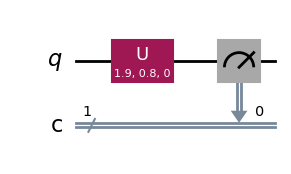

{'0': 33582, '1': 66418}


In [26]:
qc_psi_Qiskit = QuantumCircuit(1,1)
qc_psi_Qiskit.u(theta,phi,0,0)

'añadimos el medidor efectivo segun queramos medir <X>, <Y> o <Z>'
P = 'Z'
#P = 'X'
#P = 'Y'

if P =='X':
    qc_psi_Qiskit.h(0)    

elif P =='Y':
    qc_psi_Qiskit.sdg(0)
    qc_psi_Qiskit.h(0)

qc_psi_Qiskit.measure(0,0)    
display(qc_psi_Qiskit.draw('mpl')) 

nshots = 100000

counts_psi = AerSimulator().run(qc_psi_Qiskit,shots = nshots).result().get_counts()
print(counts_psi)


Now, with the relative frequencies of the eigenvalues of Z, we can calculate the mean values


In [1]:
mean_P = 0
for bits, counts in counts_psi.items():
    # Asignamos +1 si el bit es '0', -1 si es '1'
    eigenvalue = (-1) ** int(bits)
    mean_P += eigenvalue * (counts / nshots)

print(f'<{P}> = {np.round(mean_P, 5)}')

NameError: name 'counts_psi' is not defined

Finally, we are now in a position to calculate the expected value of an arbitrary observable

<div class="alert alert-block alert-success">
<b>Exercise:</b> 
<br>    
generate an arbitrary observable $A$. Obtain the coefficients $a_i$ and calculate the expected value 
    
\begin{eqnarray*}
\langle A\rangle_\psi  = ~a_0 + a_1 \langle X\rangle_\psi + a_2 \langle Y\rangle_\psi + a_3 \langle Z\rangle_\psi
\end{eqnarray*}
</div>

### $\langle A \rangle$ with a single circuit

We can write the decomposition of $A$ in the following way

$$
A = a_0 I + |{\bf a}| ~ \hat \bn \cdot \bsig 
$$

where ${\bf a} = (a_1,a_2,a_3)~$ and $~\hat \bn = {\bf a}/ |{\bf a}|$. 
So now

$$
\langle A \rangle_\psi  = a_0 + |\bf a| \,  \langle \bn \cdot \bsig  \rangle_\psi
$$

We see that to calculate $\langle A \rangle_\psi$ it is sufficient to know the values $a_i = (a_0,{\bf a})$ and **a single circuit** that provides us with the expected value $\langle \bn \cdot \bsig  \rangle_\psi$. 


The key to this last point is to use the *effective meter* in the direction $\hat \bn$ 

<br>

<figure><center>
<img src="images/Un_meter.png" align=center width='40%'/>
</center></figure>

<br>

With the output of this circuit, the expected value is analogous

$$
\langle \bn \cdot \bsig  \rangle_\psi =  + \frac{n_0}{N} - \frac{n_1}{N}
$$

<div class="alert alert-block alert-success">
<b>Exercise:</b> 
   
Write a function <i>exp_val</i> that calculates the expected value of an operator $A$ in a state $\ket{\psi}$ using this method. Verify that it is consistent with the previous method. 
</div>

## Standard Deviation


Given a random variable, $(\lambda,p(\lambda))$, the *variance* is *the mean value of the squared deviation around the mean*
<br>
<br>
$$
~~\sigma ^2 = \overline{(\lambda-\bar\lambda)^2} = \sum_i p_i (\lambda_i - \bar \lambda)^2
$$


In the case where the random variable is the results of the measurements of an observable $A$ in a quantum state $\ket{\psi}$, the variance will be the mean value of the operator $(A-\langle A\rangle_\psi)^2$, that is
<br>
<br>
\begin{align}
\sigma(A,\psi)^2 &= \langle  (A - \langle A\rangle_\psi )^2 \rangle_\psi \\  \rule{0mm}{8mm}
&= \bra{\psi} (A - \langle A\rangle_\psi )^2 \ket{\psi} \\ \rule{0mm}{8mm}
&= \bra{\psi} (A^2 - 2 A \langle A\rangle_\psi + \langle A\rangle_\psi^2 ) \ket{\psi} \\  \rule{0mm}{8mm}
& = \bra{\psi}A^2\ket{\psi} - \bra{\psi}A\ket{\psi}^2
\end{align}
<br>

so that, we arrive at the following expression for the standard deviation $\Delta_\psi A = \sigma(A,\psi)$

<div class="alert alert-block alert-info",text-align:center>
<p style="color: navy;">  
<b>Lemma:</b> <i> 
<br>standard deviation of an observable in a state</i> $\ket{\psi}$ is given by 
<br>
<br>
$$  \Delta_\psi A =  \sqrt{\bra{\psi}A^2\ket{\psi} - \bra{\psi} A\ket{\psi}^2}
$$
<br>
</div>


<div class="alert alert-block alert-success">
<b>Exercise:</b> 
<br>
Write a function <i>std_dev</i>, which receives as arguments an observable $A$ and a state $\ket{\psi}$ and obtains $\Delta_\psi A$ from a quantum circuit. 
</div>

<div class="alert alert-block alert-success">
<b>Exercise:</b> 
<br>
Generate two random observables $A$ and $B$. Using the <i>std_dev</i> function, verify the Heisenberg uncertainty relation
<br>
<br>
$$
\Delta_\psi A\, \Delta_\psi B \geq \frac{1}{2} | \langle [A,B]\rangle_\psi |
$$
</div>

## Expected Value of a Unitary Operator

Suppose we know how to prepare, using a circuit, the state $\ket{\psi}$ from the state $\ket{0}$.

$$\ket{\psi} = U\ket{0}$$

In this case, we can calculate the expected value of any unitary operator $V$ as follows

$$
\bra{\psi}V\ket{\psi} = \bra{0} U^\dagger V U\ket{0} = \braket{0}{\tilde \psi}
$$

where $$\ket{\tilde\psi} \equiv U^\dagger V U\ket{0}$$ 

and the action of the unitary operator $U^\dagger V U$ is performed through a composition of circuits initialized in $\ket{0}$

Measuring $\ket{\tilde \psi}$ in the $Z$ basis, the relative fraction of results $0\to n_0/N$ gives us access to the *modulus of the expected value*,

$$
\sqrt{ \frac{n_{0}(\tilde\psi)}{N} } ~=~  \sqrt{p_0}  ~=~   | \braket{0}{\tilde \psi}|  ~=~ |\bra{\psi}V\ket{\psi}|   
$$


<div class="alert alert-block alert-info">
<p style="text-align:left ;color: navy;">  
Circuit necessary to measure $\langle V\rangle_{\psi} $ where $\ket{\psi} = U\ket{0}$ is a preparable state
<br>
<br>
<div>
<img src="images/vev_unitary_V.png" width="45%" style="margin:auto"/>
</p>
</div>


If $V$, in addition to being <i>unitary</i>, was <i>hermitian</i>, then we would have access to the complete expected value, as it is a real quantity.

One-qubit unitary and hermitian operators are, for example, the operators 
$V = X,Y,Z,H$. 
</div>

This argument allows us to calculate in another way 

$$
\left. 
\begin{array}{c} \langle Z\rangle_\psi \\ \rule{0mm}{8mm} \langle X\rangle_\psi \\ \rule{0mm}{8mm} \langle Y\rangle_\psi \end{array}
\right\} ~=~\braket{0}{\tilde\psi} ~=~ \sqrt{\frac{n_{0}(\tilde\psi)}{N}} ~~~\hbox{with}~~~~
\left\{ 
\begin{array}{l}  \ket{\tilde \psi} = U^\dagger  Z  U\ket{0} \\ \rule{0mm}{8mm} \ket{\tilde \psi} = U^\dagger H Z H U\ket{0}  \\ \rule{0mm}{8mm}  \ket{\tilde \psi} = U^\dagger SH Z HS^\dagger U\ket{0} \end{array}
\right.
$$

As we can see, we gain ease of calculation but lose information about the sign of $\langle V\rangle_\psi$

<div class="alert alert-block alert-success">
<b>Exercise:</b> 
Calculate using this procedure the values of $\langle X\rangle_\psi$, $\langle Y\rangle_\psi$, and $\langle Z\rangle_\psi$ found previously and verify that you obtain the same result. 
</div>

In [ ]:
' el operador unitario que genera |psi>  a partir de |0> es U(theta, phi, 0,0)'
qc_psi_U = QuantumCircuit(1,1)
qc_psi_U.u(theta,phi,0,0)


'fijemos el observable a medir'
P = 'Y'
if P =='X':
    qc_psi_U.x(0)
elif P=='Y':
    qc_psi_U.y(0)
elif P=='Z':
    qc_psi_U.z(0)
    
qc_psi_U.u(-theta,-phi,0,0)

qc_psi_U.measure(0,0)

display(qc_psi_U.draw('mpl'))

' ejecutamos '
shots= 100000
counts=AerSimulator().run(qc_psi_U,shots=shots).result().get_counts()

' ahora solo nos interesa la fracción de 0s '
mean_P = np.sqrt(counts['0']/shots)
print('|<',P,'>| =',np.round(mean_P,5))